# Análisis Exploratorio de Datos para predecir ictus en personas

In [44]:
import numpy as np
import pandas as pd 

In [45]:
df = pd.read_csv('stroke_dataset.csv')

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [47]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [48]:
duplicates = df.duplicated()
print(f"Número de filas duplicadas: {duplicates.sum()}")

Número de filas duplicadas: 0


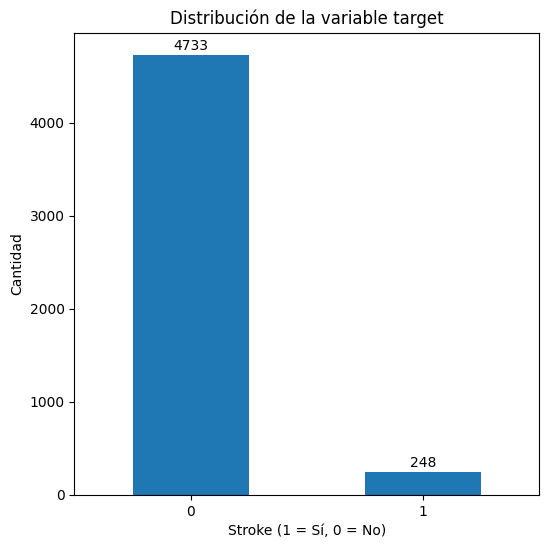

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = df['stroke'].value_counts().sort_index()

plt.figure(figsize=(6, 6))  # ancho=6, alto=4


ax = counts.plot(kind='bar')
plt.title('Distribución de la variable target')
plt.xlabel('Stroke (1 = Sí, 0 = No)')
plt.ylabel('Cantidad')

plt.xticks(rotation=0)

for i, v in enumerate(counts):
    ax.text(i, v + 50, str(v), ha='center', fontsize=10)

plt.show()

Vemos que el dataset está bastante desbalanceado:

- No ictus: 248 (4,98%)

- Ictus: 4733 (95,02%)

In [50]:
for col in df.columns:
    print(f"Columna: {col}")
    print(f"Valores únicos: {df[col].nunique()}")
    print("-------")

Columna: gender
Valores únicos: 2
-------
Columna: age
Valores únicos: 104
-------
Columna: hypertension
Valores únicos: 2
-------
Columna: heart_disease
Valores únicos: 2
-------
Columna: ever_married
Valores únicos: 2
-------
Columna: work_type
Valores únicos: 4
-------
Columna: Residence_type
Valores únicos: 2
-------
Columna: avg_glucose_level
Valores únicos: 3895
-------
Columna: bmi
Valores únicos: 342
-------
Columna: smoking_status
Valores únicos: 4
-------
Columna: stroke
Valores únicos: 2
-------


In [51]:
discarded_columns = ["age", "avg_glucose_level", "bmi"]

for col in df.columns:
    if col not in discarded_columns:
        print(f"Columna: {col}")
        print(f"Valores únicos: {df[col].unique()}")
        print("-------")

Columna: gender
Valores únicos: ['Male' 'Female']
-------
Columna: hypertension
Valores únicos: [0 1]
-------
Columna: heart_disease
Valores únicos: [1 0]
-------
Columna: ever_married
Valores únicos: ['Yes' 'No']
-------
Columna: work_type
Valores únicos: ['Private' 'Self-employed' 'Govt_job' 'children']
-------
Columna: Residence_type
Valores únicos: ['Urban' 'Rural']
-------
Columna: smoking_status
Valores únicos: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
-------
Columna: stroke
Valores únicos: [1 0]
-------


In [52]:
unknwon_count = (df['smoking_status'] == "Unknown").sum()
print(f"Número de filas con 'smoking_status' como 'Unknown': {unknwon_count}")

Número de filas con 'smoking_status' como 'Unknown': 1500


## Normalización y transformación de los datos

- "gender": convertir de objeto a binario
- "ever_married": convertir de objeto a binario
- "work_type": convertir de objeto a binario
- "Residence_type": convertir de objeto a binario
- "smoking_status": convertir de objeto a binario


Decidir qué hacemos con df["smoking_status] == "Unknwon" porque son muchas filas.

In [ ]:
# lista de columnas categóricas a convertir
multiclass_columns = ["work_type", "smoking_status"]

# usamos get_dummies para convertir las columnas categóricas en variables dummy
df = pd.get_dummies(df, columns=multiclass_columns, drop_first=True)

In [54]:
binary_columns = ["gender", "ever_married", "Residence_type"]
mapping_dict = {
    "gender": {"Male": 1, "Female": 0},
    "ever_married": {"Yes": 1, "No": 0},
    "Residence_type": {"Urban": 1, "Rural": 0}
}

for col in binary_columns:
    df[col] = df[col].map(mapping_dict[col])

In [55]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,True,False,False,True,False,False
1,1,80.0,0,1,1,0,105.92,32.5,1,True,False,False,False,True,False
2,0,49.0,0,0,1,1,171.23,34.4,1,True,False,False,False,False,True
3,0,79.0,1,0,1,0,174.12,24.0,1,False,True,False,False,True,False
4,1,81.0,0,0,1,1,186.21,29.0,1,True,False,False,True,False,False
